In [5]:
# 📌 Step 2: Imports
import os
import joblib
import pandas as pd
from prophet import Prophet

# Define paths
BASE_DIR = os.getcwd()
MODEL_DIR = os.path.join(BASE_DIR, "models")
os.makedirs(MODEL_DIR, exist_ok=True)

# Drug product columns
PRODUCT_COLS = ["M01AB","M01AE","N02BA","N02BE","N05B","N05C","R03","R06"]


In [6]:
# 📌 Step 3: Helper function to train Prophet models
def train_prophet_for_each_category(df, freq, model_prefix):
    models = {}
    for col in PRODUCT_COLS:
        print(f"🔹 Training Prophet for {col} ({model_prefix})...")
        
        df_cat = df[["datum", col]].rename(columns={"datum": "ds", col: "y"})
        
        # Prophet with seasonality
        model = Prophet(daily_seasonality=True,
                        weekly_seasonality=True,
                        yearly_seasonality=True)
        model.fit(df_cat)
        
        models[col] = model
    
    # Save models
    path = os.path.join(MODEL_DIR, f"{model_prefix}_prophet.pkl")
    joblib.dump(models, path)
    print(f"✅ Saved {model_prefix} Prophet models -> {path}")
    
    return models


In [7]:
# 📌 Step 4: Train DAILY models
csv_path = "salesdaily.csv" 
daily_df = pd.read_csv(csv_path, parse_dates=["datum"])
daily_models = train_prophet_for_each_category(daily_df, freq="D", model_prefix="daily")


🔹 Training Prophet for M01AB (daily)...


18:56:32 - cmdstanpy - INFO - Chain [1] start processing
18:56:33 - cmdstanpy - INFO - Chain [1] done processing
18:56:33 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for M01AE (daily)...


18:56:33 - cmdstanpy - INFO - Chain [1] done processing
18:56:33 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for N02BA (daily)...


18:56:33 - cmdstanpy - INFO - Chain [1] done processing
18:56:33 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for N02BE (daily)...


18:56:34 - cmdstanpy - INFO - Chain [1] done processing
18:56:34 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for N05B (daily)...


18:56:34 - cmdstanpy - INFO - Chain [1] done processing
18:56:34 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for N05C (daily)...


18:56:34 - cmdstanpy - INFO - Chain [1] done processing
18:56:35 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for R03 (daily)...


18:56:35 - cmdstanpy - INFO - Chain [1] done processing


🔹 Training Prophet for R06 (daily)...


18:56:35 - cmdstanpy - INFO - Chain [1] start processing
18:56:35 - cmdstanpy - INFO - Chain [1] done processing


✅ Saved daily Prophet models -> c:\Users\visha\Downloads\perplexity-pharma2\ml-services\models\models\daily_prophet.pkl


In [8]:
# 📌 Step 5: Train WEEKLY models
csv_path = "salesweekly.csv"
weekly_df = pd.read_csv(csv_path, parse_dates=["datum"])
weekly_models = train_prophet_for_each_category(weekly_df, freq="W", model_prefix="weekly")


18:59:59 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for M01AB (weekly)...


18:59:59 - cmdstanpy - INFO - Chain [1] done processing
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] done processing


🔹 Training Prophet for M01AE (weekly)...


18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] done processing


🔹 Training Prophet for N02BA (weekly)...


18:59:59 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for N02BE (weekly)...


18:59:59 - cmdstanpy - INFO - Chain [1] done processing
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] done processing


🔹 Training Prophet for N05B (weekly)...


19:00:00 - cmdstanpy - INFO - Chain [1] start processing
19:00:00 - cmdstanpy - INFO - Chain [1] done processing


🔹 Training Prophet for N05C (weekly)...


19:00:00 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for R03 (weekly)...


19:00:00 - cmdstanpy - INFO - Chain [1] done processing
19:00:00 - cmdstanpy - INFO - Chain [1] start processing
19:00:00 - cmdstanpy - INFO - Chain [1] done processing


🔹 Training Prophet for R06 (weekly)...
✅ Saved weekly Prophet models -> c:\Users\visha\Downloads\perplexity-pharma2\ml-services\models\models\weekly_prophet.pkl


In [9]:
# 📌 Step 6: Train MONTHLY models
csv_path = "salesmonthly.csv"
monthly_df = pd.read_csv(csv_path, parse_dates=["datum"])
monthly_models = train_prophet_for_each_category(monthly_df, freq="M", model_prefix="monthly")


19:02:03 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for M01AB (monthly)...


19:02:03 - cmdstanpy - INFO - Chain [1] done processing
19:02:03 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for M01AE (monthly)...


19:02:04 - cmdstanpy - INFO - Chain [1] done processing
19:02:04 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for N02BA (monthly)...


19:02:04 - cmdstanpy - INFO - Chain [1] done processing
19:02:04 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for N02BE (monthly)...


19:02:05 - cmdstanpy - INFO - Chain [1] done processing
19:02:05 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for N05B (monthly)...


19:02:05 - cmdstanpy - INFO - Chain [1] done processing
19:02:05 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for N05C (monthly)...


19:02:06 - cmdstanpy - INFO - Chain [1] done processing
19:02:06 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for R03 (monthly)...


19:02:06 - cmdstanpy - INFO - Chain [1] done processing
19:02:06 - cmdstanpy - INFO - Chain [1] start processing


🔹 Training Prophet for R06 (monthly)...


19:02:07 - cmdstanpy - INFO - Chain [1] done processing


✅ Saved monthly Prophet models -> c:\Users\visha\Downloads\perplexity-pharma2\ml-services\models\models\monthly_prophet.pkl


  0%|          | 0/40 [00:00<?, ?it/s]20:01:57 - cmdstanpy - INFO - Chain [1] start processing
20:02:11 - cmdstanpy - INFO - Chain [1] done processing
  2%|▎         | 1/40 [00:14<09:30, 14.63s/it]20:02:11 - cmdstanpy - INFO - Chain [1] start processing
20:02:15 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 2/40 [00:19<05:29,  8.68s/it]20:02:15 - cmdstanpy - INFO - Chain [1] start processing
20:02:16 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 3/40 [00:20<03:11,  5.18s/it]20:02:17 - cmdstanpy - INFO - Chain [1] start processing
20:02:24 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 4/40 [00:27<03:38,  6.07s/it]20:02:24 - cmdstanpy - INFO - Chain [1] start processing
20:02:49 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 5/40 [00:52<07:30, 12.86s/it]20:02:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:04 - cmdstanpy - INFO - Chain [1] done processing
 15%|█▌        | 6/40 [01:07<07:41, 13.58s/it]20:03:04

         mae        rmse
0  66.059241  106.219154
1  58.348404  101.364520
2  55.743570  100.348426
3  40.494735   57.027324
4  36.147147   52.668473
MAPE: inf%
           ds       y    M01AE   N02BA    N02BE   N05B  N05C    R03     R06  \
64 2019-05-31  168.04   97.258  104.10  703.562  265.8  26.0  322.0  135.40   
65 2019-06-30  151.54  101.627  103.20  610.000  193.0  25.0  142.0  156.04   
66 2019-07-31  181.00  103.541   92.80  649.800  250.6  20.0  115.0  105.20   
67 2019-08-31  181.91   88.269   84.20  518.100  237.0  26.0  145.0   97.30   
68 2019-09-30  161.07  111.437   93.50  984.480  227.8  16.0  161.0  109.10   
69 2019-10-31   44.37   37.300   20.65  295.150   86.0   7.0   37.0   11.13   
70 2019-11-30     NaN      NaN     NaN      NaN    NaN   NaN    NaN     NaN   
71 2019-12-31     NaN      NaN     NaN      NaN    NaN   NaN    NaN     NaN   
72 2020-01-31     NaN      NaN     NaN      NaN    NaN   NaN    NaN     NaN   
73 2020-02-29     NaN      NaN     NaN      NaN  

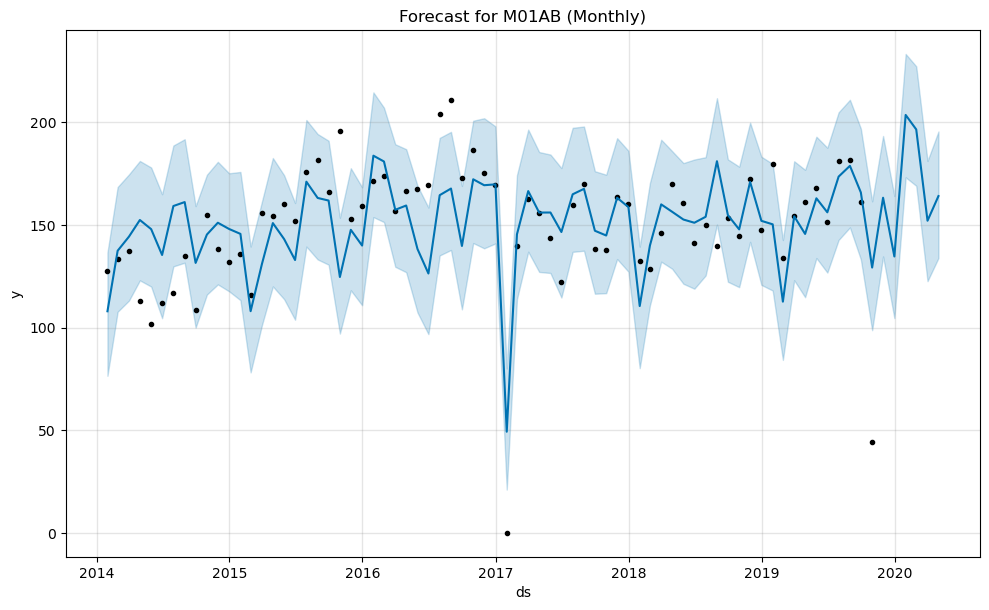

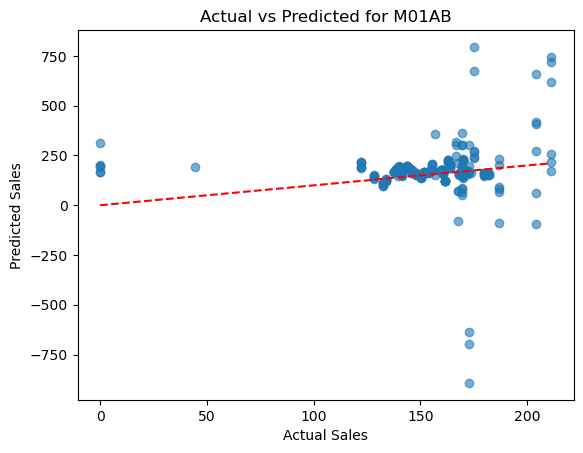

In [14]:
import pandas as pd
import joblib
from prophet.diagnostics import performance_metrics, cross_validation
import matplotlib.pyplot as plt

# 🔹 Load Prophet models dict (monthly models)
model_path = "models/monthly_prophet.pkl"
models_dict = joblib.load(model_path)

# 🔹 Select product to test
product = "M01AB"   # can be changed to other product
prophet_model = models_dict[product]

# 🔹 Load monthly dataset
df = pd.read_csv("salesmonthly.csv")   # adjust path if needed
df["datum"] = pd.to_datetime(df["datum"])
df = df.rename(columns={"datum": "ds", product: "y"})  # Prophet requires ds, y

# 🔹 Cross-validation (last 6 months as test)
cv_results = cross_validation(
    prophet_model,
    initial="730 days",   # train on ~2 years of monthly data
    period="30 days",     # predict every month
    horizon="180 days"    # last 6 months horizon
)

# 🔹 Performance metrics
metrics = performance_metrics(cv_results)
print(metrics[["mae", "rmse"]].head())   # Prophet’s available metrics

# 🔹 Manual MAPE calculation
cv_results["error"] = abs(cv_results["y"] - cv_results["yhat"]) / cv_results["y"]
mape = cv_results["error"].mean() * 100
print(f"MAPE: {mape:.2f}%")

# 🔹 Forecast future values (next 6 months)
future = prophet_model.make_future_dataframe(periods=6, freq="ME")
forecast = prophet_model.predict(future)

# 🔹 Compare actual vs predicted
result = pd.merge(df, forecast[["ds", "yhat"]], on="ds", how="right")
print(result.tail(12))

# 🔹 Plot forecast
fig = prophet_model.plot(forecast)
plt.title(f"Forecast for {product} (Monthly)")
plt.show()

# 🔹 Optional: Plot actual vs predicted (scatter)
plt.scatter(cv_results["y"], cv_results["yhat"], alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Actual vs Predicted for {product}")
plt.plot([cv_results["y"].min(), cv_results["y"].max()],
         [cv_results["y"].min(), cv_results["y"].max()],
         color="red", linestyle="--")
plt.show()


In [1]:
import pandas as pd
import joblib
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import r2_score
import numpy as np

def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    return 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-6)
    )

def evaluate_prophet_model(model, df, horizon="180 days", initial="730 days", period="30 days"):
    """
    Evaluate a trained Prophet model on given data.
    
    df must have columns: ["ds", "y"]
    """
    # Prophet CV
    cv_results = cross_validation(
        model,
        initial=initial,
        period=period,
        horizon=horizon
    )

    # Prophet built-in metrics
    metrics = performance_metrics(cv_results)

    # Extract arrays
    y_true = cv_results["y"].values
    y_pred = cv_results["yhat"].values

    # Custom metrics
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-6))) * 100
    smape_val = smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = metrics["mae"].mean()
    rmse = metrics["rmse"].mean()

    # Accuracy (custom, relative to mean actuals)
    mean_actual = np.mean(y_true)
    accuracy = max(0, 100 * (1 - mae / (mean_actual + 1e-6)))

    results = {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "sMAPE (%)": smape_val,
        "R²": r2,
        "Accuracy (%)": accuracy
    }
    return results, cv_results, metrics

# -------------------------
# Usage Example
# -------------------------
# Load saved models
models_dict = joblib.load("models/monthly_prophet.pkl")

# Pick product
product = "M01AB"
model = models_dict[product]

# Load dataset
df = pd.read_csv("salesmonthly.csv")
df["datum"] = pd.to_datetime(df["datum"])
df = df.rename(columns={"datum": "ds", product: "y"})

# Evaluate
results, cv_results, metrics = evaluate_prophet_model(model, df)
print("📊 Prophet Evaluation Results:")
print(results)


c:\Users\visha\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
  0%|          | 0/40 [00:00<?, ?it/s]09:09:33 - cmdstanpy - INFO - Chain [1] start processing
09:09:49 - cmdstanpy - INFO - Chain [1] done processing
  2%|▎         | 1/40 [00:15<10:12, 15.70s/it]09:09:49 - cmdstanpy - INFO - Chain [1] start processing
09:09:53 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 2/40 [00:20<05:45,  9.09s/it]09:09:53 - cmdstanpy - INFO - Chain [1] start processing
09:09:54 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 3/40 [00:21<03:19,  5.38s/it]09:09:54 - cmdstanpy - INFO - Chain [1] start processing
09:10:01 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 4/40 [00:28<03:40,  6.12s/it]09:10:02 - cmdstanpy

📊 Prophet Evaluation Results:
{'MAE': 66.6305238906641, 'RMSE': 125.98009838866317, 'MAPE (%)': 517688902.7367385, 'sMAPE (%)': 33.62870833691321, 'R²': -20.34611928782043, 'Accuracy (%)': 56.83056922462969}
